In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset_3.csv to dataset_3.csv


In [0]:
import io
import pandas as pd
import numpy as np
import random

df2 = pd.read_csv(io.BytesIO(uploaded['dataset_3.csv']))
data = df2.values

# Loading A and B 
A = data[:, 0]
B = data[:, 1]

In [0]:
def distance(a, b):
    return np.linalg.norm(a - b)

In [0]:
def standardize(x):
    # rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).
    num = x - np.mean(x)
    den = np.std(x)
    return (num / den)

In [0]:
def closest_mean(x, means):
    k = len(means)
    d = float('inf')
    idx = -1
    for i in range(k):
        temp = distance(means[i], x)
        if temp < d:
            d = temp
            idx = i
    return idx

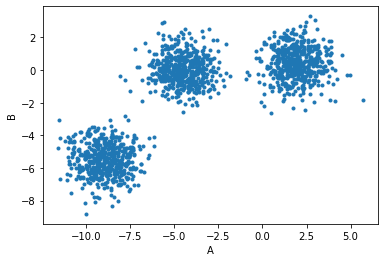

In [9]:

import matplotlib.pyplot as plt

plt.plot(A, B, '.')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

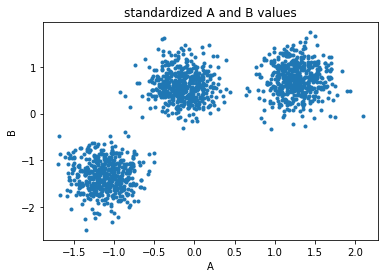

In [10]:
# standardization
A = standardize(A)
B = standardize(B)
plt.plot(A, B, '.')
plt.title('standardized A and B values')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

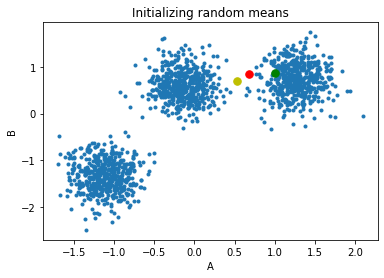

In [27]:
K = 3
means = np.random.rand(3,2) #initializing the means

means = np.array(means)

plt.plot(A, B, '.')
plt.plot(means[0][0], means[0][1], 'r.',markersize=15)
plt.plot(means[1][0], means[1][1], 'g.',markersize=15)
plt.plot(means[2][0], means[2][1], 'y.',markersize=15)


plt.title('Initializing random means')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

iteration 0


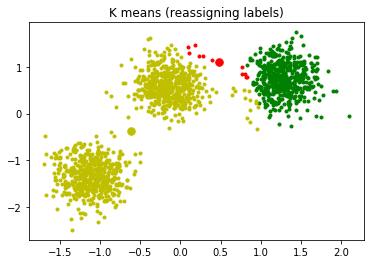

iteration 1


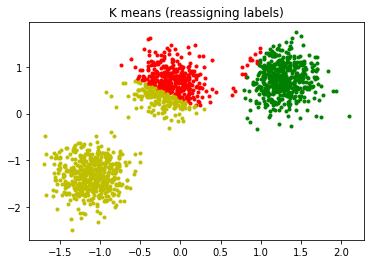

iteration 2


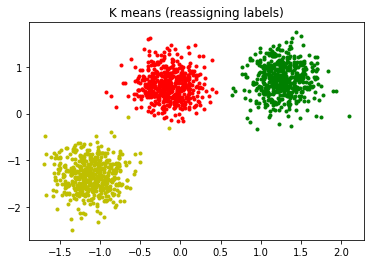

iteration 3


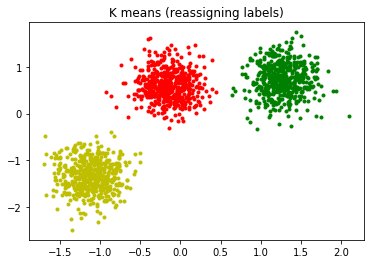

iteration 4


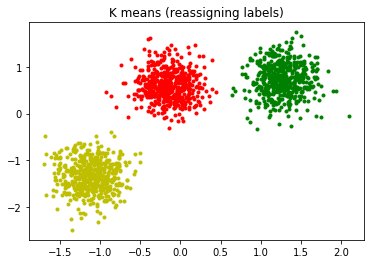

iteration 5


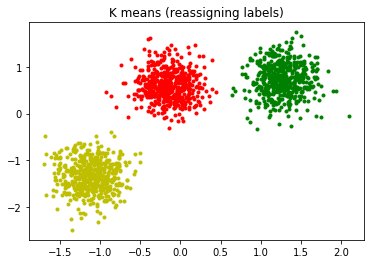

iteration 6


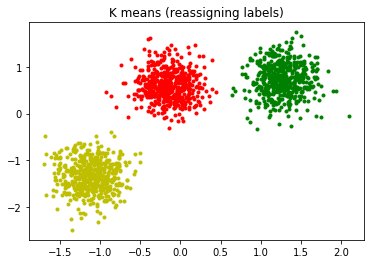

iteration 7


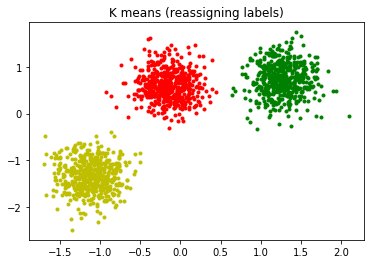

iteration 8


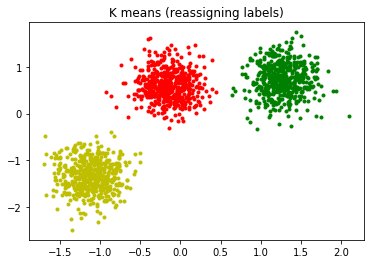

iteration 9


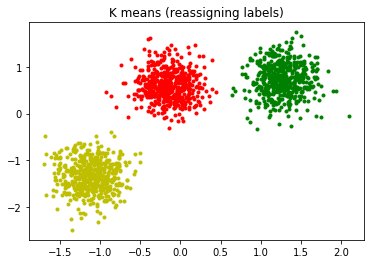

In [28]:
n_iter = 10
for i in range(n_iter):
       n = i
       l = len(A)
       labels = [0] * l
       for i in range(l):
            A1 = A[i]
            B1 = B[i]
            x = [A1, B1]
            x = np.array(x)
            label = closest_mean(x, means)
            labels[i] = label
       labels = np.array(labels)

       #assigning labels
       a, b = A[labels == 0], B[labels == 0]
       c, d = A[labels == 1], B[labels == 1]
       e, f = A[labels == 2], B[labels == 2]

       
      
        #updating means 
       means[0] = [a.mean(), b.mean()]
       means[1] = [c.mean(), d.mean()]
       means[2] = [e.mean(), f.mean()]
       
       plt.plot(a, b, 'r.')
       plt.plot(means[0][0], means[0][1], 'r.', markersize=15)

       plt.plot(c, d, 'g.')
       plt.plot(means[1][0], means[1][1], 'g.', markersize=15)

       plt.plot(e, f, 'y.')
       plt.plot(means[2][0], means[2][1], 'y.', markersize=15)
       
       print("iteration",n)
       plt.title('K means (reassigning labels)')


       plt.show()
       